# Lab 3: Galaxy Image Classification & the Galaxing Merger Rate
### Due Friday May 7
Jacqueline Telson

### Problem 1

I classified a few galaxies on Galaxy Zoo and I liked how the classification scheme started with simple questions such as if the galaxy was smooth or had features, and then moved progressivley to more detailed questions. This made it not overwhelming to describe what the galaxy looked like. 

I did encounter ambiguous objects, for example in the screenshot below, I did not know which galaxy I should focus on classifying. 

<img src="ambiguous.png" style="width:200px;height:200px">

Below is an an example of a galaxy I encountered with clear spiral structure on the left, and one of a galaxy that is morphologically smooth on the right.
<table><tr>
    <td> <img src="spiral.png" style="width:200px;height:200px"> </td>
    <td> <img src="smooth.png" style="width:200px;height:200px"> </td>
    </tr> </table>

### Problem 2

1. The cuts applied to the SDSS DR7 imaging survey to construct the Galaxy Zoo 2 (GZ2) sample include a Petrosian half-light magnitude brighter than 17.0 in the r-band ($m_r > 17$), a size limit of petroR90_r > 3 arcsec, galaxies which had a spectroscopic redshift in the DR7 catalogue outside the range 0.0005 < z < 0.25 were removed; however, galaxies without reported redshifts were kept, objects which are flagged by the SDSS pipeline as saturated, bright or blended without an accompanying nodeblend flag were also excluded. This resulted in 245,609 galaxies in GZ2.

2. Each galaxy image is 424 × 424 pixels in size, scaled to (0.02×petroR90_r) arcsec per pixel. This corresponds to a physical range of 0.000216 kpc to 0.0811 kpc per pixel. 

3. The GZ2 tree has 11 classification tasks with a total of 37 possible responses. The minimum number of questions for each galaxy is 1 and the maximum is 11. <img src="classification_table.png">

4. GZ1 only classified between spiral and elliptical systems while GZ2 classification scheme includes a much wider variety of morphological features. 

5. For most of the duration of GZ2, images shown to classifiers were randomly selected from the database. However, images with low numbers of classifications were shown at a higher rate toward the end of the project.

6. A galaxy typically got 44 classifications.

7. To deal with unreliable classifications, an individual user weighting scheme was applied.

8.  The apparent redshift evolution was caused by the adjustments in vote fractions for classification bias. 

9. Classification bias is when certain labels have lower probabilities since they have to be classified as another label before getting the option to be classified as that label. For example, a galaxy cant be classified as having 2 spiral arms if it wasn't classified as having spiral arms in the first place. GZ2 attempts to correct for this classification bias by normalizing by bins.

10. Higher redshift galaxies are more likely to be classified as mergers becuase for a galaxy to be calssified as a merger, it has to go through many other classifications beforehand.

11. The reported classifications are floats becuase they are the probability that the galaxy has to be in that class.

### Problem 3

Astronomers care about morphological classifications of galaxies because they can tell us about galaxy evolution since farther away galaxies are older than closer galaxies.

### Problem 4

Astronomers want to systematically search for merging galaxies because "the galaxy merger rate over cosmic time is one of the fundamental measures of the evolution of galaxies" (Lotz). 

### Problem 5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# download training set as a pandas dataframe
tr_class_table = pd.read_csv('training_classifications.csv')
tr_class_table

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0        100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1        100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2        100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3        100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4        100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
...         ...       ...       ...       ...       ...       ...       ...   
61573    999948  0.510379  0.489621  0.000000  0.059207  0.430414  0.000000   
61574    999950  0.901216  0.098784  0.000000  0.000000  0.098784  0.000000   
61575    999958  0.202841  0.777376  0.019783  0.116962  0.660414  0.067245   
61576    999964  0.091000  0.909000  0.000000  0.045450  0.863550  0.022452   
61577    999967  0.767000  0.140000  0.093000  0.000000  0.140000  0.000000   

       Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0      0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1      0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2      0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3      0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4      0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   
...         ...       ...       ...  ...       ...        ...        ...   
61573  0.430414  0.226257  0.204157  ...  0.000000   0.226257   0.000000   
61574  0.098784  0.000000  0.098784  ...  0.000000   0.000000   0.000000   
61575  0.593168  0.140022  0.520391  ...  0.000000   0.000000   0.090673   
61576  0.841098  0.795330  0.068220  ...  0.000000   0.068398   0.318132   
61577  0.140000  0.023380  0.116620  ...  0.000000   0.023380   0.000000   

       Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  \
0       0.000000   0.000000   0.092886   0.000000   0.000000        0.0   
1       0.459950   0.000000   0.591328   0.000000   0.000000        0.0   
2       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
3       0.094549   0.189098   0.000000   0.000000   0.000000        0.0   
4       0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
...          ...        ...        ...        ...        ...        ...   
61573   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61574   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   
61575   0.049349   0.000000   0.067726   0.000000   0.000000        0.0   
61576   0.408799   0.227464   0.408799   0.090668   0.023065        0.0   
61577   0.000000   0.000000   0.000000   0.000000   0.000000        0.0   

       Class11.6  
0       0.325512  
1       0.000000  
2       0.000000  
3       0.000000  
4       0.000000  
...          ...  
61573   0.226257  
61574   0.000000  
61575   0.072296  
61576   0.045334  
61577   0.023380  

[61578 rows x 38 columns]

In [3]:
print('Number of images in training set: ', len(tr_class_table))

Number of images in training set:  61578


In [4]:
import os
def listdir_nohidden(path):
    for f in os.listdir(path):
        if not f.startswith('.'):
            yield f

In [5]:
# check that there are the same number of images in the training_images folder
img_list = list(listdir_nohidden('training_images'))
number_files = len(img_list)
print(number_files)

61578


In [6]:
# find dimension of images in training set
plt.imread('training_images/'+img_list[0]).shape

(424, 424, 3)

The image dimensions are 424 x 424 pixels

In [7]:
# generate 25 random images
import random
sample_img_list = random.sample(img_list, 25)

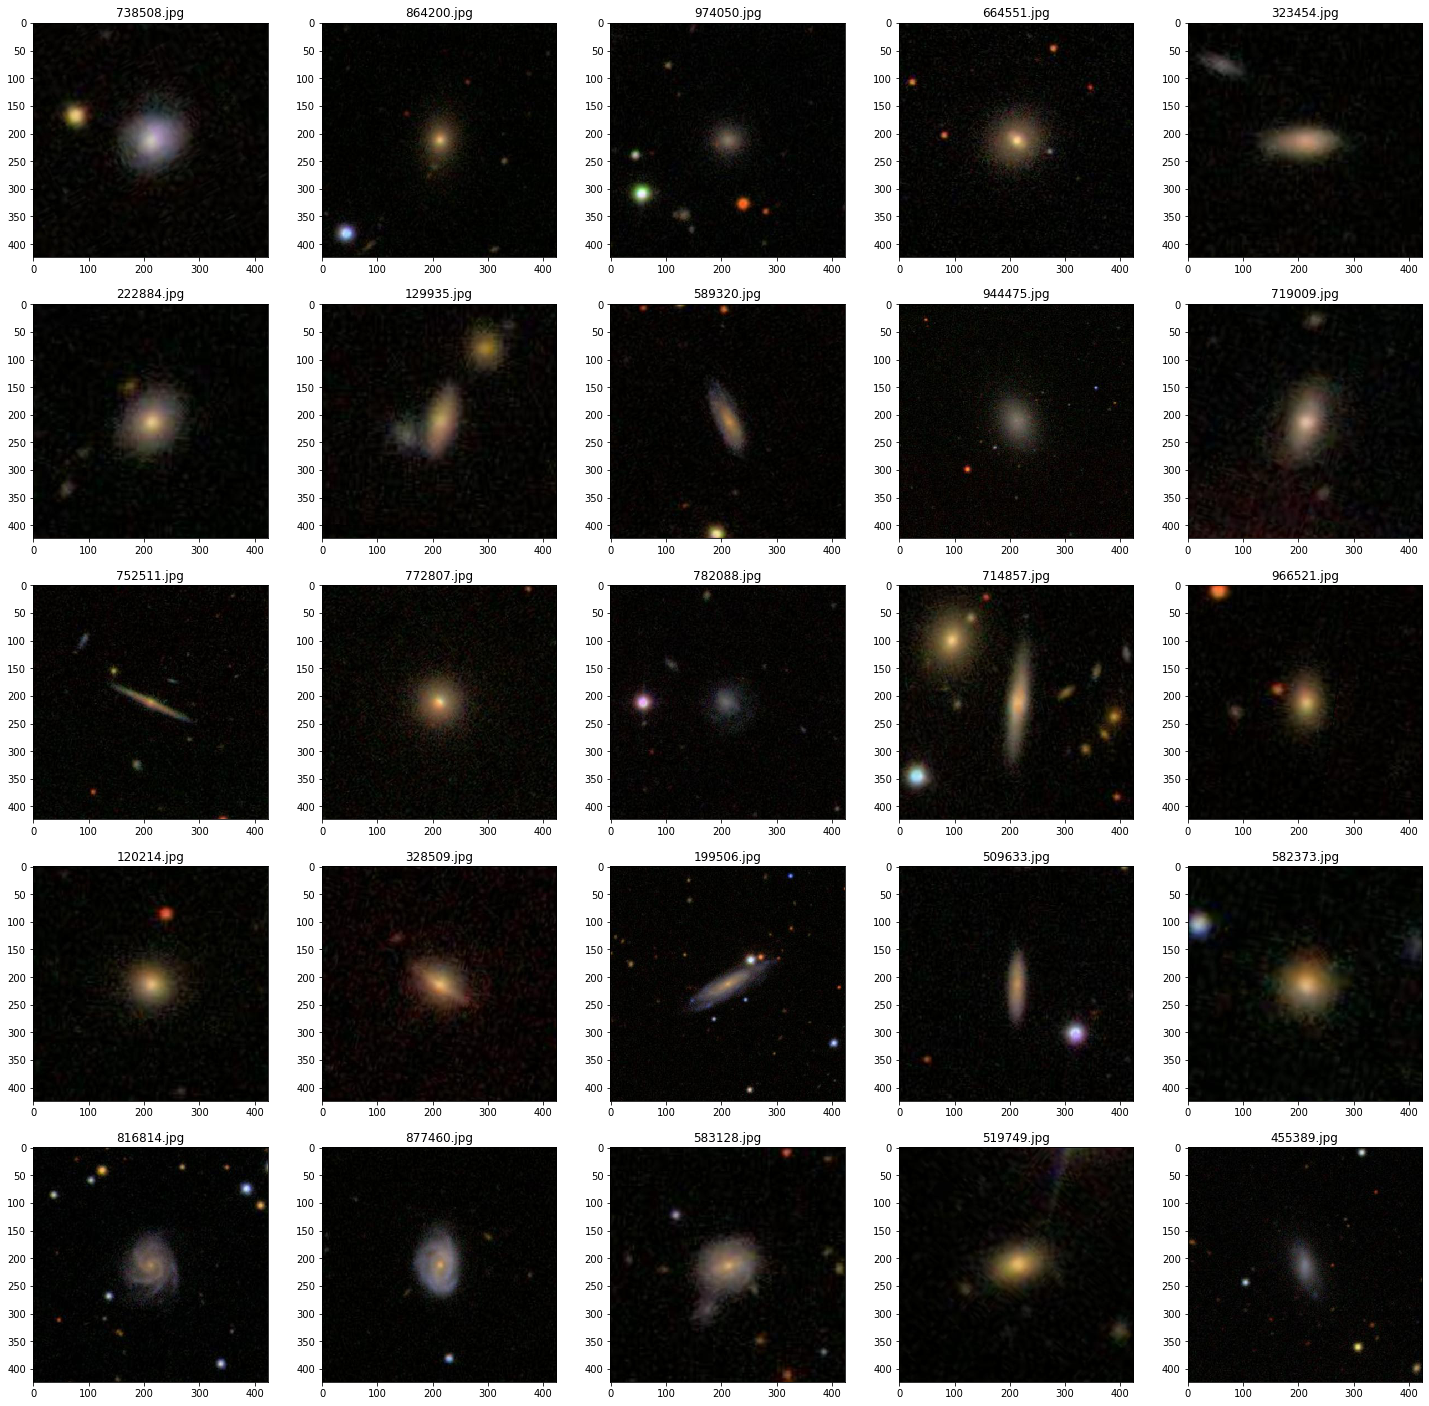

In [10]:
# plot the 25 random images
fig, axes = plt.subplots(nrows=5,ncols=5, figsize=(25,25))
for i, ax in enumerate(axes.flatten()):
    ax.set_title(str(sample_img_list[i]))
    ax.imshow(plt.imread('training_images/'+sample_img_list[i]))
plt.show()  

### Problem 6

In [8]:
tr_class_table.shape

(61578, 38)

In [11]:
labels = ['smooth', 'features or disk', 'star or artifact', 'edge-on', 'face-on', 'bar feature', \
          'no bar feature', 'spiral arm pattern', 'no spiral arm pattern', 'no bulge', 'noticable bulge', \
          'obvious bulge', 'dominant bulge', 'odd', 'nothing odd', 'completely round', 'inbetween round', \
          'cigar-shaped', 'ring', 'lens or arc', 'disturbed', 'irregular', 'other feature', 'merger', 'dust lane', \
          'rounded bulge', 'boxy bulge', 'no bulge', 'tight spiral arms', 'medium spiral arms', \
          'loose spiral arms', '1 spiral arm', '2 spiral arms', '3 spiral arms', '4 spiral arms', \
          '5+ spiral arms', 'cant tell number of spiral arms', ]

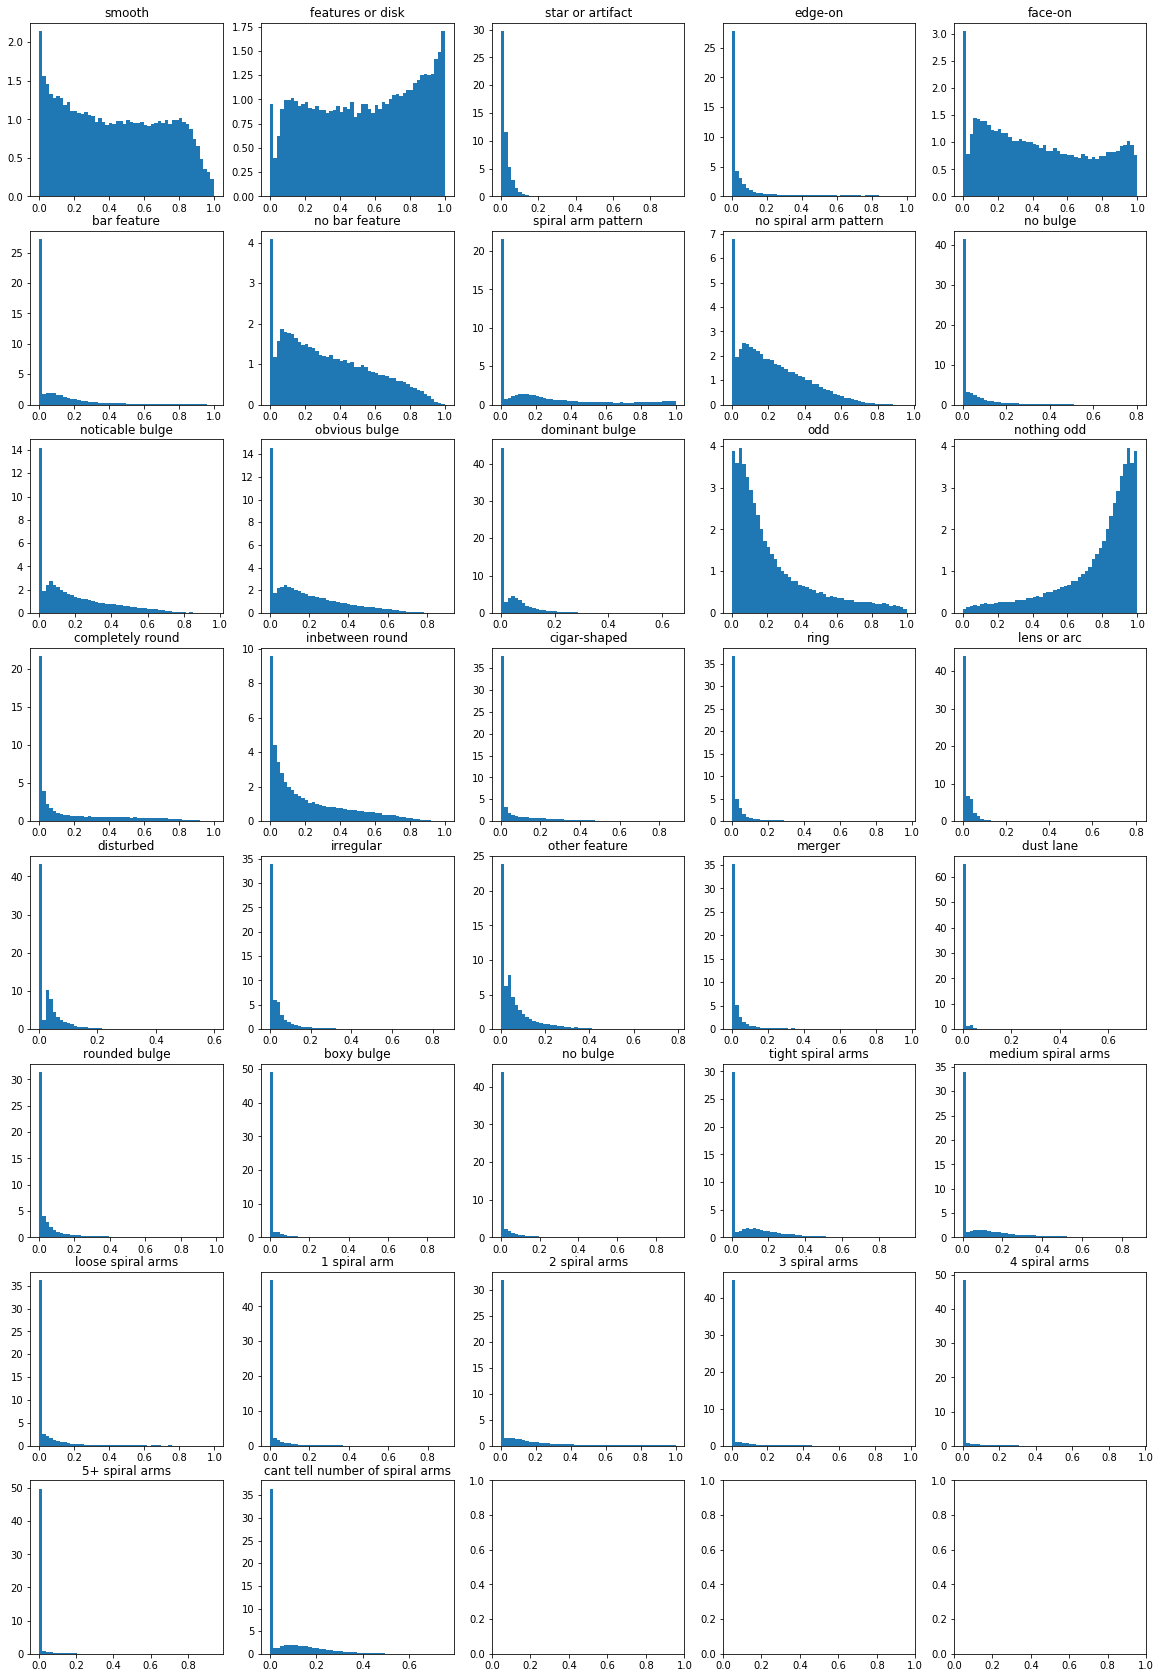

In [14]:
# plot distributions of the training labels for each of the 37 labels
fig, axes = plt.subplots(nrows=8,ncols=5, figsize=(20,30))
for i, ax in enumerate(axes.flatten()):
    if i>36:
        break
    vals = tr_class_table.iloc[:,i+1]
    label = labels[i]
    ax.hist(vals, bins=50, density=1)
    ax.set_title(label)
plt.show()    

For features that are skewed left, then the galaxy would most likely be classified for that label. For features that are skewed right, then the galaxy would most likely no be classified for that label.

Some features are bimodal where there is a large peak at 0.0 then a smaller peak at a higher value, such as ;no bar feature', 'spiral arm pattern', 'no spiral arm pattern', 'noticable bulge', 'obvious bulge', 'dominant bulge', 'disturbed', and 'cant tell number of spiral arms'.

### Problem 7

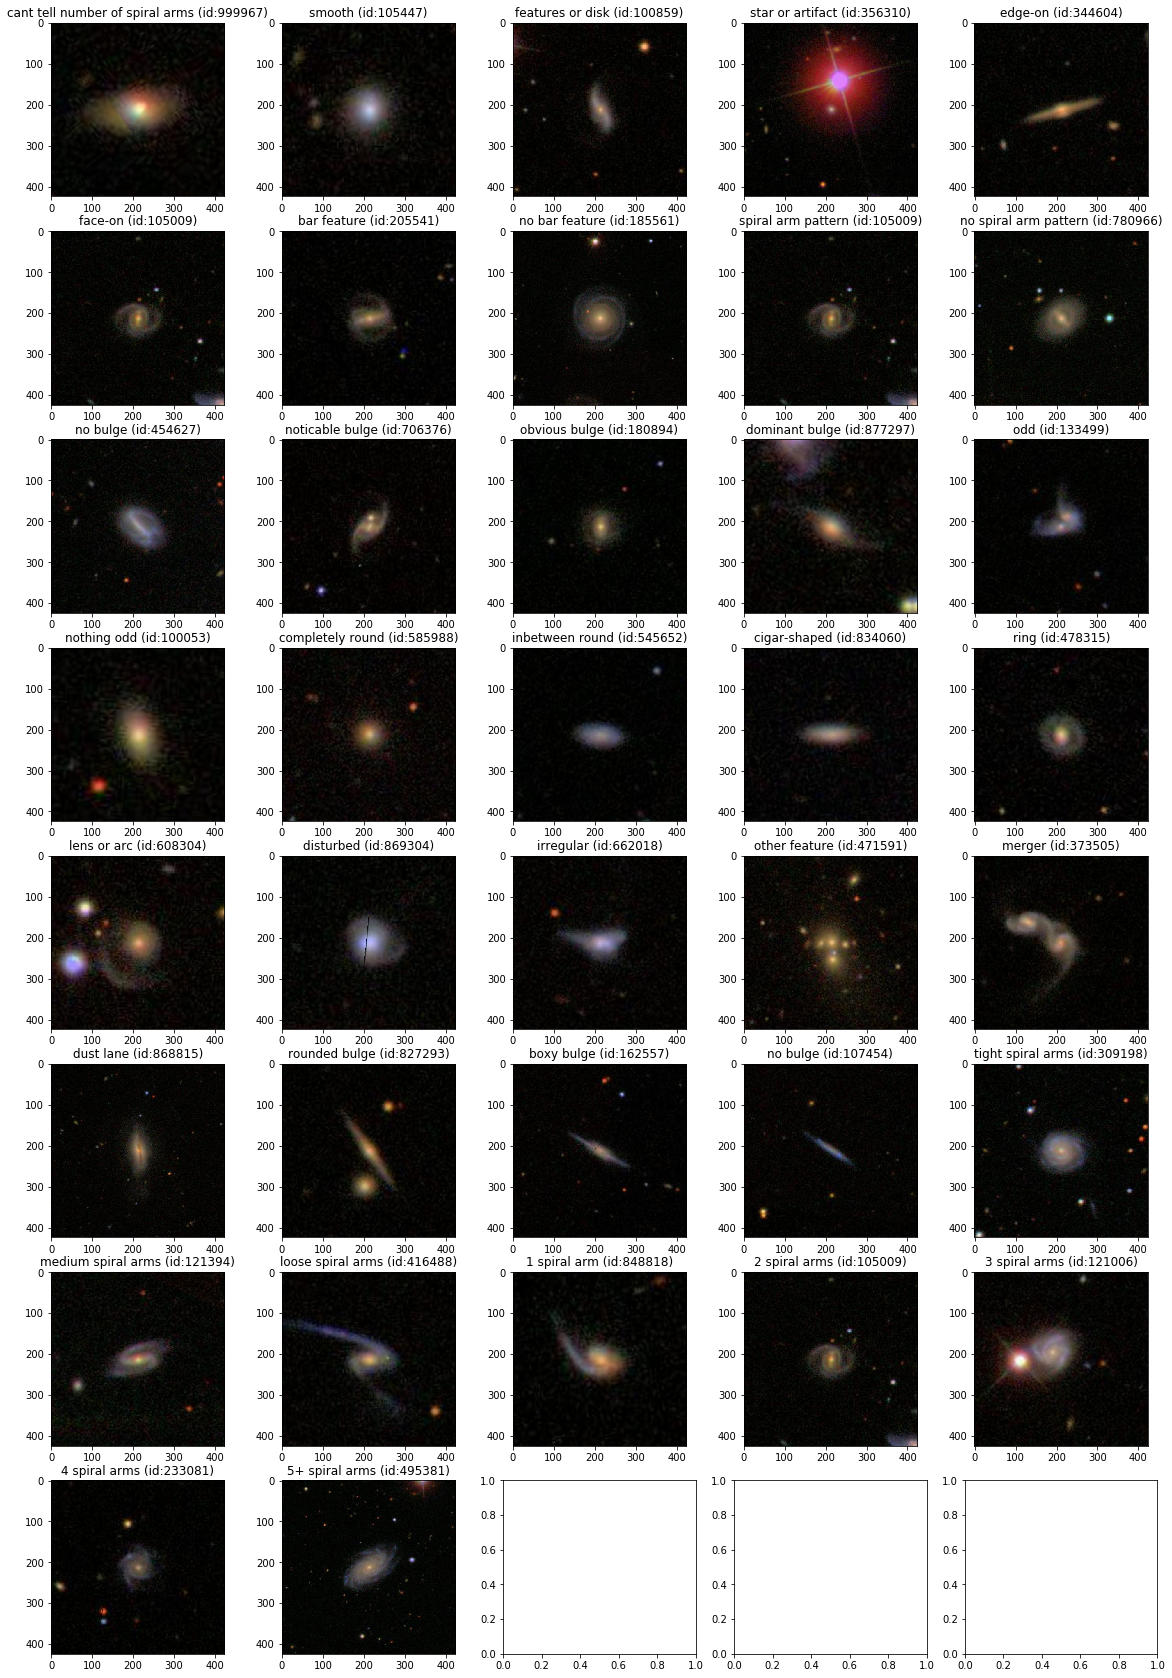

In [16]:
# plot the image in the training set that is the prototype of each label
fig, axes = plt.subplots(nrows=8,ncols=5, figsize=(20,30))
for i, ax in enumerate(axes.flatten()):
    if i>36:
        break
    index = tr_class_table.iloc[:,i].idxmax()
    gal_id = tr_class_table.iloc[:,0][index]
    ax.imshow(plt.imread('training_images/'+str(gal_id)+'.jpg'))
    ax.set_title(labels[i-1]+' (id:'+str(gal_id)+')')
plt.show() 

Based on these images, I think that the labels that will be easy to classify are: 
- smooth
- features or disk
- star or artifact
- edge-on
- face-on
- bar feature
- no bar feature
- spiral arm pattern
- obvious bulge
- dominant bulge
- completely round
- ring
- lens or arc


I think that the labels which are more subtle and likely to cause problems will be:
- no spiral arm pattern
- no bulge
- noticable bulge
- odd
- nothing odd
- inbetween round
- cigar shaped
- disturbed
- irregular
- other feature
- merger

### Problem 8

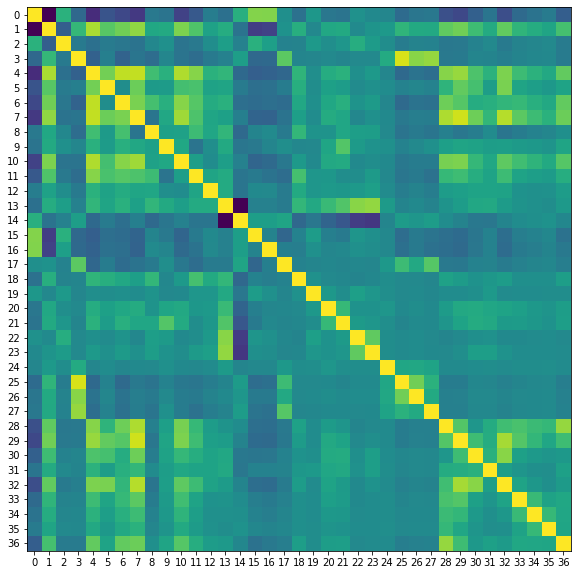

In [9]:
# Plot the correlation matrix of all labels in the training set
p_matrix = tr_class_table.iloc[:,1:].corr()

plt.figure(figsize=(10,10))
plt.imshow(p_matrix)
plt.xticks(list(range(37)))
plt.yticks(list(range(37)))
plt.show()

# purple is 0 and yellow is 1

mutually exclusive labels should have a correlation of 0, so the pixel at their intersection should be completely purple

### Problem 9

In [17]:
tr_class_table.columns

Index(['GalaxyID', 'Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2',
       'Class3.1', 'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2',
       'Class5.3', 'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2',
       'Class7.3', 'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5',
       'Class8.6', 'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')

In [18]:
# define indexes for each class
classes = [[1,2,3], [4,5], [6,7], [8,9], [10,11,12,13], [14,15], [16,17,18], [19,20,21,22,23,24,25], \
           [26,27,28], [29,30,31], [32,33,34,35,36,37]]

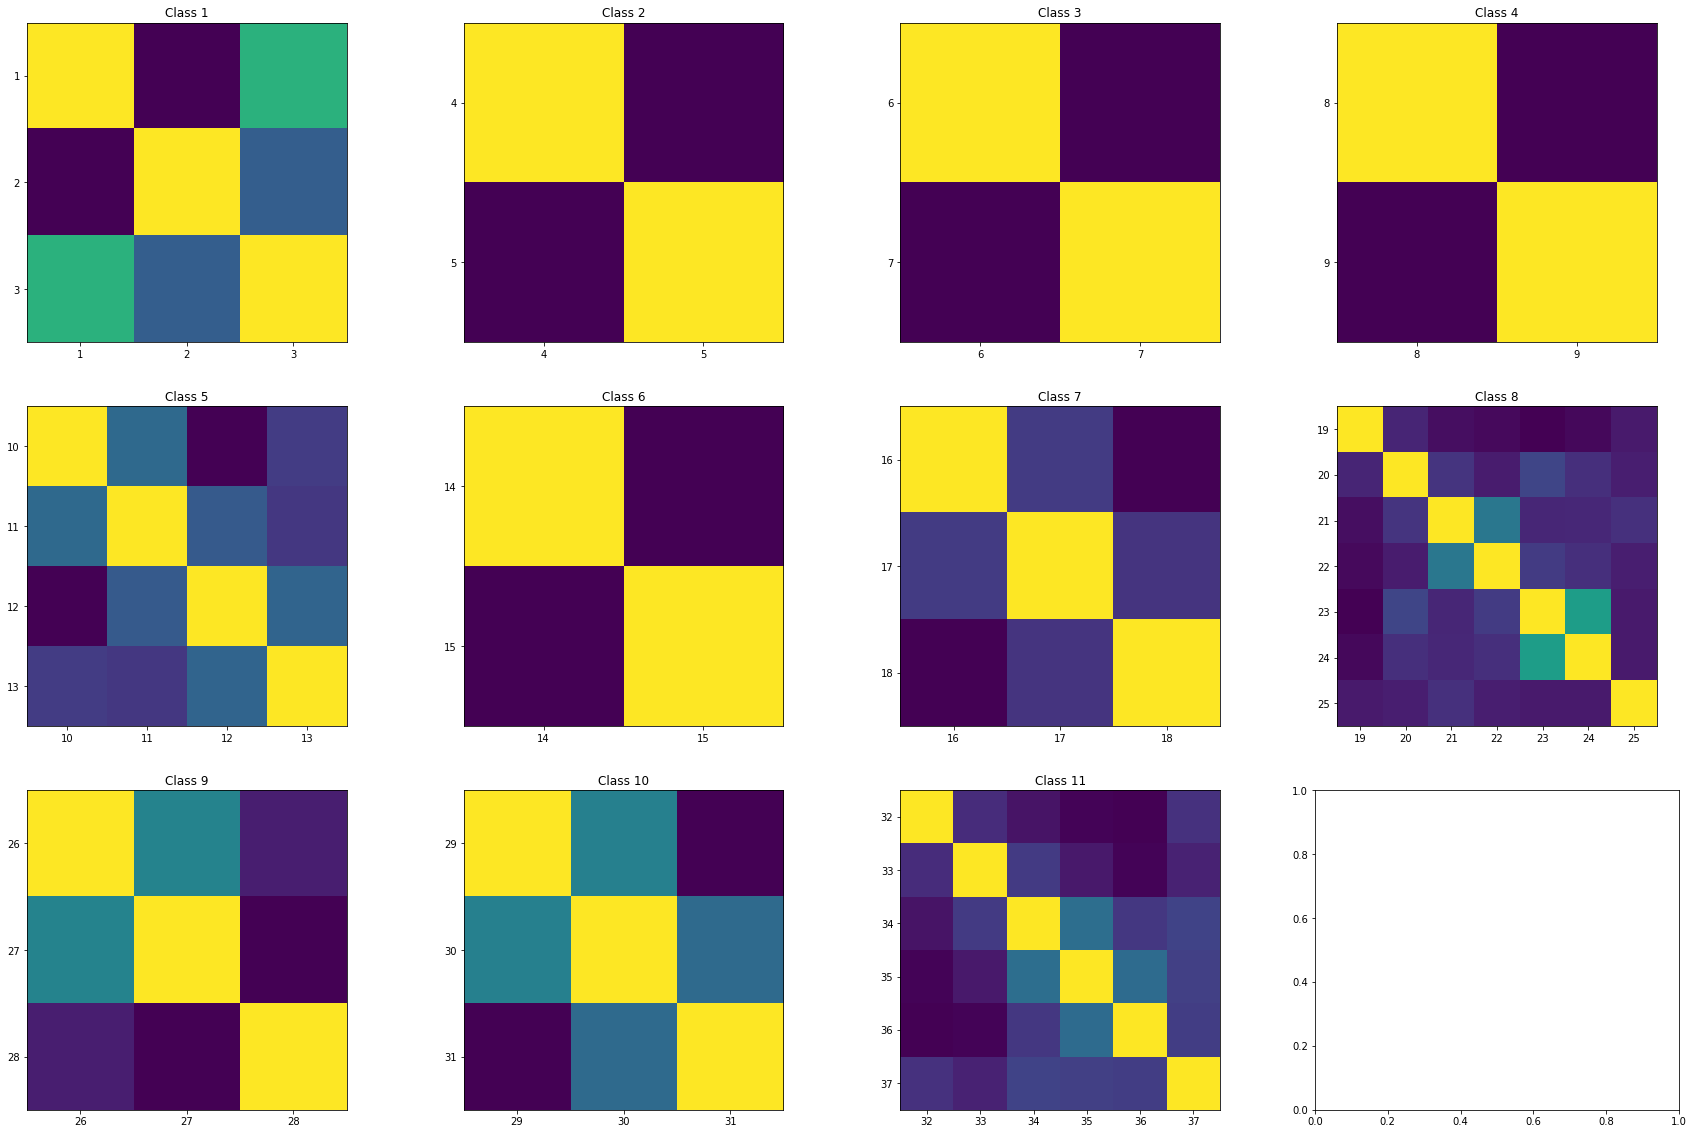

In [26]:
# Plot the correlation sub-matrices for all 11 classes
fig, axes = plt.subplots(nrows=3,ncols=4, figsize=(30,20))
for i, ax in enumerate(axes.flatten()):
    if i>10:
        break
    c = classes[i]
    p_matrix = tr_class_table.iloc[:,c].corr()
    ax.imshow(p_matrix)
    plt.sca(ax)
    plt.xticks(ticks=range(len(c)), labels=c)
    plt.yticks(ticks=range(len(c)), labels=c)
    ax.set_title('Class '+str(i+1))    
plt.show() 

The correlation coefficients between two of the same labels should be 1, for example the pixel in the Class 1 matrix at (1,1) is yellow. This is becuase the data is equal to eachother when it is the same label, so they are directly correlated.

### Problem 10

Each image is 14KB so it would take 61578x14 = 822 MB

### Problem 11

In [17]:
np.sqrt(424**2/30)

77.41145479406347

reduce by 30 --> have ~75 pixels on each side, I will reduce it to 50 just to save extra memory

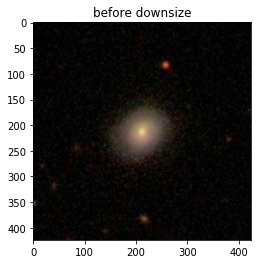

In [44]:
# plot an example image before downsizing
ex_img = plt.imread('training_images/100008.jpg')
plt.imshow(ex_img)
plt.title('before downsize')
plt.show()

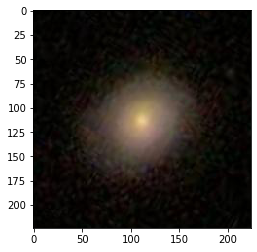

In [47]:
# see how much I should crop the edges
plt.imshow(ex_img[100:-100,100:-100])

In [48]:
# code adapted from https://opensource.com/life/15/2/resize-images-python
from PIL import Image

#define a downsizing function which will save new downsized images
def downsize(img, name):
    new_img = img[100:-100,100:-100]
    img_file = Image.fromarray(new_img, "RGB")
    basewidth = 20
    wpercent = (basewidth / float(img_file.size[0]))
    hsize = int((float(img_file.size[1]) * float(wpercent)))
    img_file = img_file.resize((basewidth, hsize), Image.ANTIALIAS)
    img_file.save('downsized_training_images/d_'+name)

In [49]:
#downsize the example image
downsize(ex_img, '100008.jpg')

In [50]:
# this new file is only 905 bytes

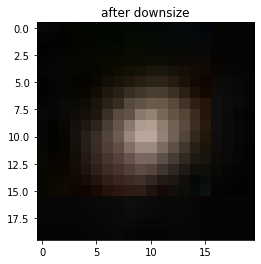

In [51]:
# plot downsized example image
d_ex_img = plt.imread('downsized_training_images/d_100008.jpg')
plt.imshow(d_ex_img)
plt.title('after downsize')
plt.show()

In [52]:
# downsize every image
for file_name in img_list:
    img = plt.imread('training_images/'+file_name)
    downsize(img, file_name)

In [53]:
# check to see that it worked on all the images
len(os.listdir('downsized_training_images'))

61578

In [54]:
len(img_list)

61578

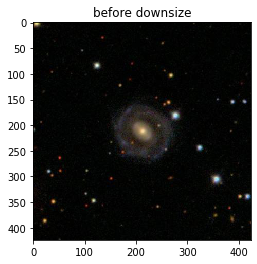

In [55]:
# check a random image to see if it worked correctly
plt.imshow(plt.imread('training_images/331547.jpg'))
plt.title('before downsize')
plt.show()

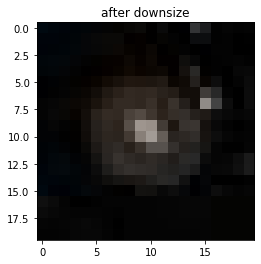

In [56]:
# compare downsized plot to original plot above
plt.imshow(plt.imread('downsized_training_images/d_331547.jpg'))
plt.title('after downsize')
plt.show()

### Problem 12

In [11]:
# define generator function
def read_in_batches(start_index, end_index):
    ''' returns tuple of galaxy id, image, and labels'''
    assert (end_index - start_index < 200) and (end_index > start_index)
    i = start_index
    while i < end_index:
        row = tr_class_table.iloc[i]
        gid = row[0]
        labels = row[1:]
        img = plt.imread('downsized_training_images/d_'+str(int(gid))+'.jpg')
        yield (gid, img, labels)
        i += 1

In [12]:
# check performance
%%time
ex_gen = read_in_batches(0,100)
# should take less that 1 second (0.01 second per image)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.87 µs


In [22]:
# check to see that the generator works properly
next(ex_gen)

(100008.0,
 array([[[1, 1, 0],
         [1, 1, 0],
         [1, 1, 0],
         ...,
         [4, 3, 1],
         [4, 4, 2],
         [4, 4, 2]],
 
        [[2, 2, 0],
         [2, 2, 0],
         [3, 3, 1],
         ...,
         [4, 3, 1],
         [2, 2, 0],
         [2, 2, 0]],
 
        [[4, 4, 2],
         [4, 4, 2],
         [4, 4, 2],
         ...,
         [4, 3, 1],
         [2, 2, 0],
         [2, 2, 0]],
 
        ...,
 
        [[6, 5, 3],
         [7, 6, 4],
         [7, 6, 4],
         ...,
         [2, 2, 0],
         [4, 4, 2],
         [4, 4, 2]],
 
        [[6, 6, 4],
         [3, 3, 1],
         [3, 3, 1],
         ...,
         [5, 5, 3],
         [7, 6, 4],
         [5, 4, 2]],
 
        [[6, 6, 4],
         [3, 3, 1],
         [3, 3, 1],
         ...,
         [5, 5, 3],
         [7, 6, 4],
         [5, 4, 2]]], dtype=uint8),
 Class1.1     0.383147
 Class1.2     0.616853
 Class1.3     0.000000
 Class2.1     0.000000
 Class2.2     0.616853
 Class3.1     0.038452
 

### Problem 13

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
# Split the images and labels into a training set and a validation set
tr_table, cv_table = train_test_split(tr_class_table, test_size = .2, train_size=.8)

### Problem 14

In [28]:
# define root mean squared error function
def rmse(pred_matrix, true_matrix):
    Ngalaxies = true_matrix.shape[0]
    Nlabels = true_matrix.shape[1]
    s = 0
    for i in range(Nlabels):
        for j in range(Ngalaxies):
            s += (true_matrix[j,i] - pred_matrix[j,i])**2
    return np.sqrt(s/(Ngalaxies*Nlabels))

In [26]:
# find the mean for every label
label_means = np.array(tr_table.iloc[:,1:].mean())

In [27]:
# calculate simple model
simple_model = np.tile(label_means, (len(tr_table), 1))

In [28]:
# training RMSE
rmse(simple_model, np.array(tr_table.iloc[:,1:]))

0.1639335260715858

In [29]:
# validation RMSE
rmse(np.tile(label_means, (len(cv_table), 1)), np.array(cv_table.iloc[:,1:]))

0.16353885621321665

### Problem 15

For now, my model very closely follows the example model on the clothing images data set from lecture. I thought that this would be a good starting point since both models are classifying images. This model has a 32 node convolutional layer with max pooling and dropout, a 64 node convolutional layer with max pooling and dropour, a 128 node convolutional layer with dropout, and then flattens. Throughout the layers, I use a relu activation function and I end with a sigmoid activation function. There are 1,425,957 total parameters with 1,425,893 trainable parameters and 64 non-trainable parameters. In fitting this model, I use the keras ImageDataGenerator as an input for the training data. 

In [93]:
#!pip install tensorflow

In [19]:
import datetime, os
import numpy as np
import warnings

from IPython.external import mathjax

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Activation, BatchNormalization
)
from tensorflow.keras import backend as K
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
# Print keras version
print("Using tensorflow version:", tensorflow.keras.__version__)

Using tensorflow version: 2.4.0


In [20]:
nb_classes = len(labels)
input_shape = plt.imread('downsized_training_images/d_331547.jpg').shape

In [38]:
input_shape

(20, 20, 3)

In [21]:
# define array for training images
x_train = np.ndarray((len(tr_table['GalaxyID']),20,20,3))
for i, gid in enumerate(tr_table['GalaxyID']):
    x_train[i] = plt.imread('downsized_training_images/d_'+str(gid)+'.jpg')

In [79]:
# define array for validation images
x_cv = np.ndarray((len(cv_table['GalaxyID']),20,20,3))
for i, gid in enumerate(cv_table['GalaxyID']):
    x_cv[i] = plt.imread('downsized_training_images/d_'+str(gid)+'.jpg')

In [23]:
# define arrays for training and validation labels
y_train = np.array(tr_table.iloc[:,1:])
y_cv = np.array(cv_table.iloc[:,1:])

In [42]:
# use keras image generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# creating the data aumentation genreators for both the training images and the training label masks
data_gen_args = dict(featurewise_center=False,
                     featurewise_std_normalization=False,
                     fill_mode = 'nearest')

image_datagen = ImageDataGenerator(**data_gen_args)

seed = 42
batch_size = 100

image_generator = image_datagen.flow(
    x_train,  y_train,
    shuffle = True,
    batch_size=batch_size,
    seed=seed)

In [43]:
# create model
K.clear_session()

with tf.device('/gpu:0'):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.1))

    model.add(Conv2D(64, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.1))

    model.add(Conv2D(128, (3,3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.1))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate=0.1))
      
    model.add(Dense(32, activation='relu'))
      

    model.add(Dense(nb_classes))
    model.add(Activation('sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 18, 18, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 18, 18, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 18, 18, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 9, 9, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
activation_1 (Activation)    (None, 7, 7, 64)          0

In [45]:
# NOTE: I am using mean squared error instead of root mean squared error
# so the loss values will be smaller
model.compile(optimizer='adam',
                loss='mse',
                metrics=['accuracy'])

Training ... nn_results2/datalab_nn_2021-05-03T20:41.h5
Epoch 1/15
493/493 [==============================] - 51s 98ms/step - loss: 0.0547 - accuracy: 0.3353 - val_loss: 0.0180 - val_accuracy: 0.6485

Epoch 00001: val_accuracy improved from -inf to 0.64851, saving model to nn_results2/datalab_nn_2021-05-03T20:41.h5
Epoch 2/15
493/493 [==============================] - 34s 69ms/step - loss: 0.0185 - accuracy: 0.6283 - val_loss: 0.0169 - val_accuracy: 0.6848

Epoch 00002: val_accuracy improved from 0.64851 to 0.68480, saving model to nn_results2/datalab_nn_2021-05-03T20:41.h5
Epoch 3/15
493/493 [==============================] - 32s 64ms/step - loss: 0.0168 - accuracy: 0.6526 - val_loss: 0.0151 - val_accuracy: 0.6824

Epoch 00003: val_accuracy did not improve from 0.68480
Epoch 4/15
493/493 [==============================] - 38s 78ms/step - loss: 0.0157 - accuracy: 0.6709 - val_loss: 0.0146 - val_accuracy: 0.7029

Epoch 00004: val_accuracy improved from 0.68480 to 0.70291, saving model t

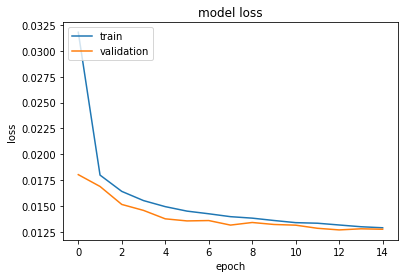

In [46]:
# train model

run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')
# define path to save model
model_path = f'nn_results2/datalab_nn_{run_time_string}.h5'
print(f"Training ... {model_path}")

logdir = os.path.join("nn_results2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

csv_logger = tf.keras.callbacks.CSVLogger(f'nn_results2/training_{run_time_string}.log')

model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)

history1 = model.fit(image_generator, 
          epochs=15,
          batch_size=batch_size,
          validation_data=(x_cv, y_cv), 
          callbacks=[tensorboard_callback, csv_logger, model_check]) 

# summarize history for loss (code adapted from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

### Problem 16

My model has 115,173 total trainable parameters. Yes this number of free parameters does make me nervous because it is alot.

In [48]:
# find total number of pixels
plt.imread('downsized_training_images/d_331547.jpg').shape[0] * \
plt.imread('downsized_training_images/d_331547.jpg').shape[1] * len(tr_table)

123155000

But, in comparison to the number of pixels in the compressed data set, it makes sense why there are that many trainable parameters.

### Problem 17

ResNets are very ueful for transfer learning.
ResNets are also very useful for finding edges in images since they have many convolutional layers which are good at detecting edges through colvulving and concatenating.

### Problem 18

I tried using ResNet50 and it took very very long to run just one epoch, so I am using ResNet18 (and it is still taking long to run but it's better than ResNet50)

In [108]:
!pip install keras_applications==1.0.7

     |████████████████████████████████| 51 kB 601 kB/s eta 0:00:011


In [111]:
from classification_models.classification_models.keras import Classifiers
input_t = tensorflow.keras.Input(shape=x_train.shape[1:])
ResNet18, preprocess_input = Classifiers.get('resnet18')
res_model = ResNet18(weights=None, input_tensor=input_t, input_shape=None)

In [112]:
# define model

K.clear_session()
with tf.device('/gpu:0'):
    model = Sequential()
    model.add(res_model)
    model.add(Flatten())
    model.add(Dense(nb_classes))
    model.add(Activation('sigmoid'))

In [114]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Functional)         (None, 1000)              11699889  
_________________________________________________________________
flatten (Flatten)            (None, 1000)              0         
_________________________________________________________________
dense (Dense)                (None, 37)                37037     
_________________________________________________________________
activation (Activation)      (None, 37)                0         
Total params: 11,736,926
Trainable params: 11,728,984
Non-trainable params: 7,942
_________________________________________________________________


In [113]:
model.compile(optimizer='adam',
                loss='mse',
                metrics=['accuracy'])

Training ... nn_results2/datalab_resnet_2021-05-03T22:13.h5
Epoch 1/15
493/493 [==============================] - 2156s 4s/step - loss: 0.1403 - accuracy: 0.5294 - val_loss: 0.0630 - val_accuracy: 0.5998

Epoch 00001: val_accuracy improved from -inf to 0.59979, saving model to nn_results2/datalab_resnet_2021-05-03T22:13.h5
Epoch 2/15
493/493 [==============================] - 2039s 4s/step - loss: 0.0548 - accuracy: 0.5947 - val_loss: 0.0395 - val_accuracy: 0.5998

Epoch 00002: val_accuracy did not improve from 0.59979
Epoch 3/15
493/493 [==============================] - 3691s 7s/step - loss: 0.0373 - accuracy: 0.5965 - val_loss: 0.0325 - val_accuracy: 0.5998

Epoch 00003: val_accuracy did not improve from 0.59979
Epoch 4/15
493/493 [==============================] - 1692s 3s/step - loss: 0.0319 - accuracy: 0.5921 - val_loss: 0.0297 - val_accuracy: 0.5998

Epoch 00004: val_accuracy did not improve from 0.59979
Epoch 5/15
493/493 [==============================] - 2517s 5s/step - loss:

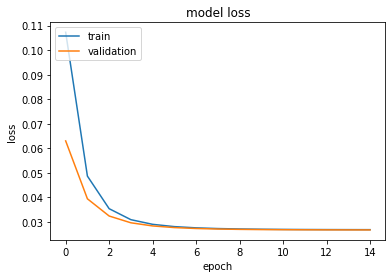

In [115]:
# train model

run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')
# define path to save model
model_path = f'nn_results2/datalab_resnet_{run_time_string}.h5'
print(f"Training ... {model_path}")

logdir = os.path.join("nn_results2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

csv_logger = tf.keras.callbacks.CSVLogger(f'nn_results2/training_{run_time_string}.log')

model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)

history2 = model.fit(image_generator, 
          epochs=15,
          batch_size=batch_size,
          validation_data=(x_cv, y_cv), 
          callbacks=[tensorboard_callback, csv_logger, model_check])

# summarize history for loss (code adapted from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

### Problems 19, 20, & 21

Since my resnet model took 12 hours to run and had a higher loss than the model from #15, I will use the model from #15 for the rest of the questions.

use tf.keras.callbacks.ReduceLROnPlateau() to reduce learning rate, add in data augmentation to the training data, and tack on a sigmoid layer at the end of the model

In [26]:
# redefine image_generator to include more data augmentation
data_gen_args = dict(featurewise_center=False,
                     featurewise_std_normalization=False,
                     rotation_range=360.,
                     rescale=1.0,
                     shear_range=0.1,
                     zoom_range=0.1,
                     horizontal_flip=True,
                     fill_mode = 'nearest')

image_datagen = ImageDataGenerator(**data_gen_args)

seed = 42
batch_size = 100

# Start with only 1000 images then I will use the whole set once I get my network to work correctly
image_generator = image_datagen.flow(
    x_train,  y_train,
    shuffle = True,
    batch_size=batch_size,
    seed=seed)

Training ... nn_results2/datalab_19_20_21_2021-05-05T22:31.h5
Epoch 1/15
493/493 [==============================] - 105s 208ms/step - loss: 0.0382 - accuracy: 0.5537 - val_loss: 0.0191 - val_accuracy: 0.6312

Epoch 00001: val_accuracy improved from -inf to 0.63121, saving model to nn_results2/datalab_19_20_21_2021-05-05T22:31.h5
Epoch 2/15
493/493 [==============================] - 76s 154ms/step - loss: 0.0196 - accuracy: 0.6002 - val_loss: 0.0173 - val_accuracy: 0.6465

Epoch 00002: val_accuracy improved from 0.63121 to 0.64648, saving model to nn_results2/datalab_19_20_21_2021-05-05T22:31.h5
Epoch 3/15
493/493 [==============================] - 74s 149ms/step - loss: 0.0182 - accuracy: 0.6238 - val_loss: 0.0178 - val_accuracy: 0.6387

Epoch 00003: val_accuracy did not improve from 0.64648
Epoch 4/15
493/493 [==============================] - 69s 140ms/step - loss: 0.0171 - accuracy: 0.6532 - val_loss: 0.0185 - val_accuracy: 0.6197

Epoch 00004: val_accuracy did not improve from 0.64

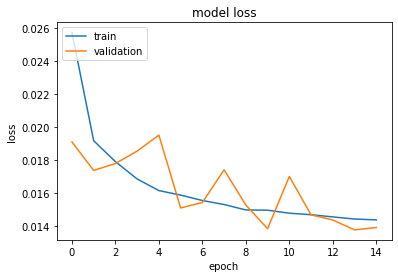

In [27]:
# define model

K.clear_session()

with tf.device('/gpu:0'):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.1))

    model.add(Conv2D(64, (3, 3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(rate=0.1))

    model.add(Conv2D(128, (3,3), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Dropout(rate=0.1))

    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dropout(rate=0.1))
      
    model.add(Dense(32, activation='relu'))
      

    model.add(Dense(nb_classes))
    model.add(Activation('sigmoid'))

# compile
model.compile(optimizer='adam',
                loss='mse',
                metrics=['accuracy'])

# train model
run_time_string = datetime.datetime.utcnow().isoformat(timespec='minutes')
# define path to save model
model_path = f'nn_results2/datalab_19_20_21_{run_time_string}.h5'
print(f"Training ... {model_path}")

logdir = os.path.join("nn_results2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', factor=0.75,
                              patience=2, min_lr=1e-6, verbose=1, cooldown=0)

csv_logger = tf.keras.callbacks.CSVLogger(f'nn_results2/training_{run_time_string}.log')

model_check = tf.keras.callbacks.ModelCheckpoint(model_path,
        monitor='val_accuracy', 
        save_best_only=True, 
        mode='max',
        verbose=1)

history3 = model.fit(image_generator, 
          epochs=15,
          batch_size=batch_size,
          validation_data=(x_cv, y_cv), 
          callbacks=[tensorboard_callback, csv_logger, model_check, reduce_lr])

# summarize history for loss (code adapted from https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='validation')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='upper left')
plt.show()

### Problem 22

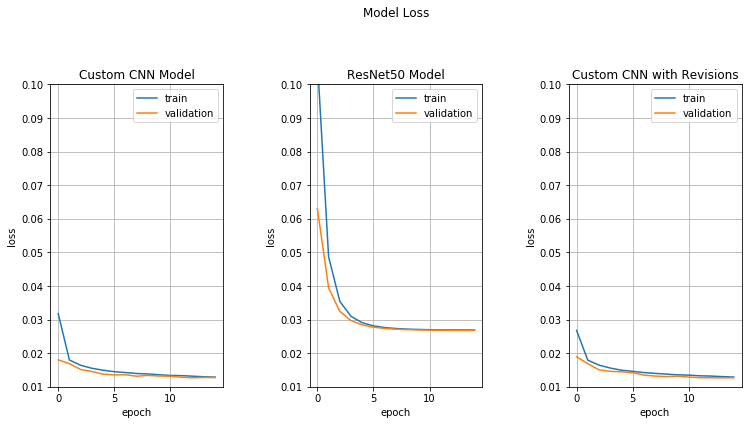

In [125]:
# Compare loss from all three different models

plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.plot(history1.history['loss'], label='train')
plt.plot(history1.history['val_loss'], label='validation')
plt.title('Custom CNN Model')
plt.ylabel('loss')
plt.ylim(0.01,0.1)
plt.yticks(np.linspace(0.01,0.1,10))
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.grid()

plt.subplot(132)
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='validation')
plt.title('ResNet50 Model')
plt.ylabel('loss')
plt.ylim(0.01,0.1)
plt.yticks(np.linspace(0.01,0.1,10))
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.grid()

plt.subplot(133)
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='validation')
plt.title('Custom CNN with Revisions')
plt.ylabel('loss')
plt.ylim(0.01,0.1)
plt.yticks(np.linspace(0.01,0.1,10))
plt.xlabel('epoch')
plt.legend(loc='upper right')
plt.grid()

plt.suptitle('Model Loss')
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.8, 
                    wspace=0.5, 
                    hspace=0.4)
plt.show()

### Problem 23

make a scatter plot between true points and labels of best model: best model so far is CNN with revisions

In [28]:
# predict labels in validation set using model

y_predicted = model.predict_proba(x_cv)
y_predicted

/Users/Jackie/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '


array([[2.25602329e-01, 7.70114362e-01, 1.31045878e-02, ...,
        9.70572233e-04, 2.11519003e-03, 7.91543424e-02],
       [1.49780542e-01, 8.36142659e-01, 1.04222596e-02, ...,
        1.36535466e-02, 8.27941298e-03, 1.11344635e-01],
       [1.42851740e-01, 8.34507287e-01, 1.82706714e-02, ...,
        8.53353739e-03, 1.45624280e-02, 8.20181370e-02],
       ...,
       [1.29648179e-01, 8.60838652e-01, 5.74561954e-03, ...,
        6.46594167e-03, 2.73349881e-03, 7.74102807e-02],
       [8.95529747e-01, 6.65470660e-02, 2.59581506e-02, ...,
        2.99719538e-08, 1.42569281e-08, 1.04051828e-03],
       [1.68868482e-01, 8.15268874e-01, 2.01120675e-02, ...,
        1.61137879e-02, 1.96871459e-02, 1.23866558e-01]], dtype=float32)

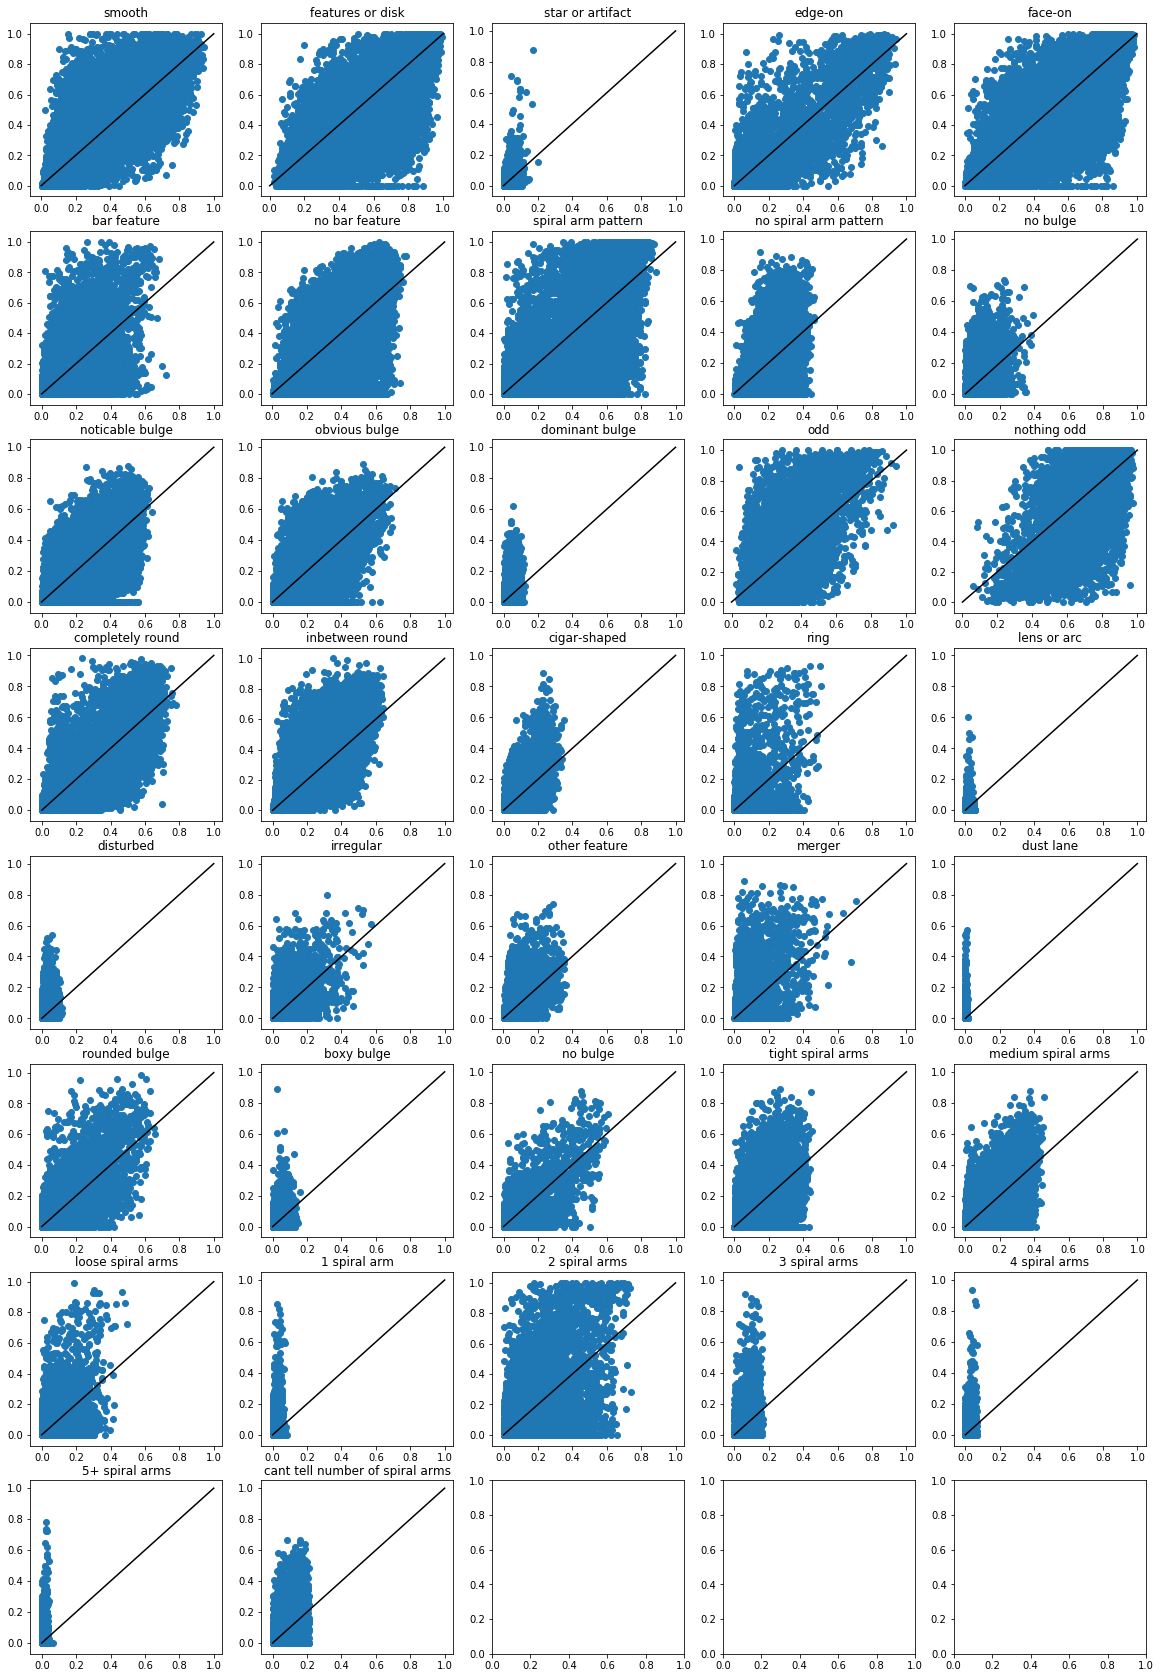

In [30]:
# Make a scatter plot comparing the “true” and “predicted” values of all 37 labels

fig1, axes1 = plt.subplots(nrows=8,ncols=5, figsize=(20,30))

for i, ax1 in enumerate(axes1.flatten()):
    if i>36:
        break
    ax1.set_title(labels[i])
    ax1.plot([0,1],[0,1], color='k')
    ax1.scatter(y_predicted[:,i], y_cv[:,i])
    
plt.show()   

From these graphs, I see that my reweighting was not correct in multiple labels such as 'lens or arc', and '1 spiral arm' 

The model seems to perform best on 'edge-on'

### Problem 24

In [31]:
# define label indexes
labels_7 = [labels.index('smooth'), labels.index('star or artifact'), \
            labels.index('edge-on'), labels.index('ring'), labels.index('lens or arc'), \
            labels.index('2 spiral arms'), labels.index('merger')]

smooth


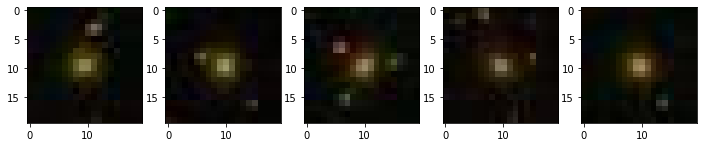

star or artifact


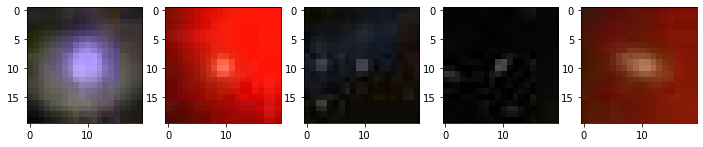

edge-on


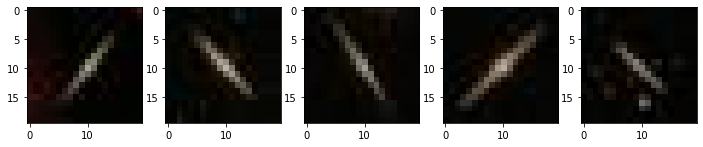

ring


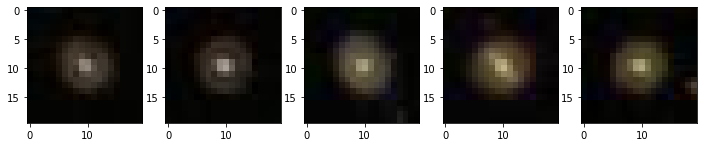

lens or arc


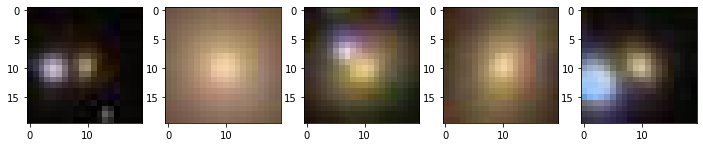

2 spiral arms


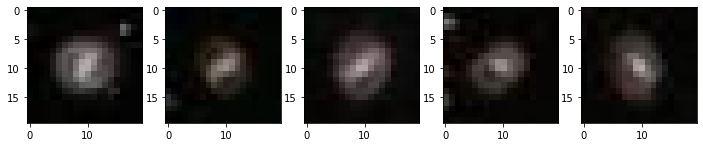

merger


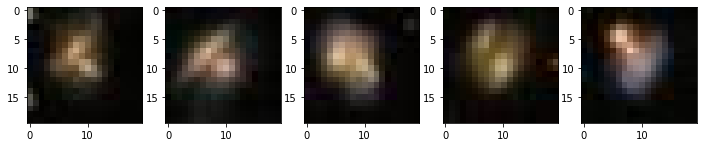

In [89]:
# plot top 5 images for each label
for l in labels_7:
    indexes = (-(y_predicted[:,l])).argsort()[:5]
    print(labels[l])
    plt.figure(figsize=(12, 6))
    for j, i in enumerate(indexes):
        plt.subplot(151+j)
        plt.imshow((x_cv[i]).astype(np.uint8))
    plt.show()

It's a bit difficult to comment on the reliability of my model's classification for these labels since the images are so downsized. However, they all seem to be classified well. 

### Problem 25

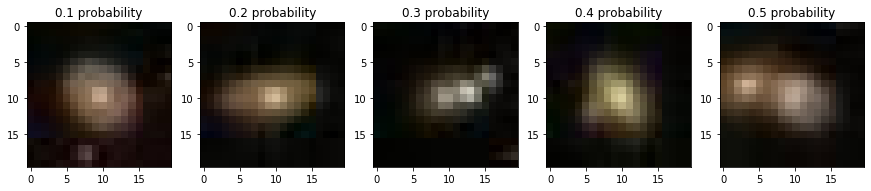

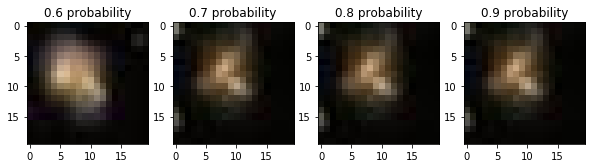

In [101]:
# plot mergers at different probabilities
plt.figure(figsize=(15, 10))
for i, p in enumerate(np.linspace(0.1,0.5,5)):
    difference_array = np.absolute(y_predicted[:,labels.index('merger')] - p)
    index = difference_array.argmin()
    plt.subplot(151+i)
    plt.imshow((x_cv[index]).astype(np.uint8))
    plt.title(str(np.round(p,1))+' probability')
plt.show()

plt.figure(figsize=(10, 10))
for i, p in enumerate(np.linspace(0.6,0.9,4)):
    difference_array = np.absolute(y_predicted[:,labels.index('merger')] - p)
    index = difference_array.argmin()
    plt.subplot(141+i)
    plt.imshow((x_cv[index]).astype(np.uint8))
    plt.title(str(p)+' probability')
plt.show()

It seems like 0.1 and 0.2 are too low probabilities, so I will make the threshold 0.3

However, this would mean that 70% of galaxies are mergers which does not sound correct to me.